# Animal Crossing!
![All hail Queen Isabelle](https://upload.wikimedia.org/wikipedia/en/2/26/Isabelle_AF.png)

I was playing Animal Crossing the other day and thought it would be fun to look at the popularity of villagers in the Animal Crossing data set :)

# Imports and cleaning the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
villagers = pd.read_csv('/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/villagers.csv')
popularity = pd.read_csv('/kaggle/input/acnh-villager-popularity/acnh_villager_data.csv')

**Note:** the popularity data set is from March 2022 so it's not fully up to date 

In [3]:
# Remove all spaces from column names
villagers = villagers.rename(columns={"Favorite Song":"Favorite_Song", 
 "Style 1":"Style_1", 
 "Style 2":"Style_2",
 "Color 1":"Color_1", 
 "Color 2":"Color_2",
 "Furniture List":"Furniture_List", 
 "Unique Entry ID":"Unique_Entry_ID"})
villagers

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite_Song,Style_1,Style_2,Color_1,Color_2,Wallpaper,Flooring,Furniture_List,Filename,Unique_Entry_ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Winnie,Horse,Female,Peppy,Fashion,31-Jan,hay-OK,K.K. Country,Cool,Simple,White,Gray,backyard-fence wall,backyard lawn,1626;1626;5970;4003;3509;1620;1627;3467;1631;1...,hrs05,b4HwfyvThyipScSAv
387,Wolfgang,Wolf,Male,Cranky,Education,25-Nov,snarrrl,K.K. D&B,Cool,Active,Black,Green,dark wooden-mosaic wall,stripe flooring,4117;7323;7323;3275;4109;3270;3196;4338;3200;3...,wol02,RbF2wcn6jRxtgLDRd
388,Yuka,Koala,Female,Snooty,Fashion,20-Jul,tsk tsk,Soulful K.K.,Cool,Elegant,Orange,Yellow,beige art-deco wall,simple purple flooring,3957;3955;2554;3974;3951;794;4106;3959;3958;997,kal00,QDcxk3dCNT6yeD9hk
389,Zell,Deer,Male,Smug,Music,7-Jun,pronk,K.K. Swing,Cool,Gorgeous,Purple,Gray,cityscape wall,monochromatic tile flooring,1875;863;4129;4053;4053;3951;794;3775;4046;423...,der02,LodBWtdMRZbjFNga9


In [4]:
villagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite_Song    391 non-null    object
 8   Style_1          391 non-null    object
 9   Style_2          391 non-null    object
 10  Color_1          391 non-null    object
 11  Color_2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture_List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique_Entry_ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

In [5]:
villagers.describe()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite_Song,Style_1,Style_2,Color_1,Color_2,Wallpaper,Flooring,Furniture_List,Filename,Unique_Entry_ID
count,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
unique,391,35,2,8,6,361,388,89,6,6,14,14,154,128,391,391,391
top,Admiral,Cat,Male,Lazy,Nature,27-Jan,sweetie,Forest Life,Simple,Simple,Black,Red,backyard-fence wall,backyard lawn,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
freq,1,23,204,60,66,2,2,15,118,110,47,53,13,13,1,1,1


In [6]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tier    413 non-null    int64 
 1   rank    413 non-null    int64 
 2   name    413 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


In [7]:
# List of names from popularity dataset that are not in villlagers data set 
[name for name in popularity['name'].values if name not in villagers['Name'].values]

['Shino',
 'Sasha',
 'Ione',
 'Cephalobot',
 'Étoile',
 'Tiansheng',
 'Petri',
 'Quinn',
 'Marlo',
 'Chai',
 'Azalea',
 'Faith',
 'Chabwick',
 'WartJr',
 'Rio',
 'Buck(Brows)',
 'Renee',
 'Chelsea',
 'Marty',
 'Roswell',
 'Zoe',
 'OHare',
 'Crackle(Spork)',
 'Ace',
 'Toby',
 'Frett',
 'Rilla']

In [8]:
# Popularity is based on a tier and the rank within that tier, so we assign a total popularity for every villager
# We also capitalize the column names so they can be merged with the villagers data frame later
popularity.columns = ['Tier', 'Rank', 'Name']
popularity = popularity.sort_values(['Tier', 'Rank'])
popularity['Total_Popularity'] = np.arange(1, len(popularity)+1)
popularity

,Tier,Rank,Name,Total_Popularity
0,1,1,Raymond,1
1,1,2,Marshal,2
2,1,3,Shino,3
3,1,4,Sherb,4
4,1,5,Sasha,5
...,...,...,...,...
408,6,159,Rocco,409
409,6,160,Bettina,410
410,6,161,Boris,411
411,6,162,Bitty,412


In [9]:
# Merge popularity information with villagers data set
villagers = pd.merge(villagers, popularity, on="Name")

# Drop wallpaper, flooring, etc. because they are almost completely unique to each villager and ∴ not that interesting for this analysis 
villagers = villagers.drop(columns=['Catchphrase', 'Birthday', 'Favorite_Song', 'Wallpaper', 'Flooring',
                                    'Furniture_List', 'Filename', 'Unique_Entry_ID'])
villagers

,Name,Species,Gender,Personality,Hobby,Style_1,Style_2,Color_1,Color_2,Tier,Rank,Total_Popularity
0,Admiral,Bird,Male,Cranky,Nature,Cool,Cool,Black,Blue,6,89,339
1,Agent S,Squirrel,Female,Peppy,Fitness,Active,Simple,Blue,Black,6,45,295
2,Agnes,Pig,Female,Big Sister,Play,Simple,Elegant,Pink,White,4,26,96
3,Al,Gorilla,Male,Lazy,Fitness,Active,Active,Red,White,6,19,269
4,Alfonso,Alligator,Male,Lazy,Play,Simple,Simple,Red,Blue,6,6,256
...,...,...,...,...,...,...,...,...,...,...,...,...
381,Winnie,Horse,Female,Peppy,Fashion,Cool,Simple,White,Gray,5,86,216
382,Wolfgang,Wolf,Male,Cranky,Education,Cool,Active,Black,Green,3,15,55
383,Yuka,Koala,Female,Snooty,Fashion,Cool,Elegant,Orange,Yellow,5,103,233
384,Zell,Deer,Male,Smug,Music,Cool,Gorgeous,Purple,Gray,3,30,70


# Exploring and visualizing the data

It's always a good idea to just look at what we have first, so here I'm taking some of the features that I care about most when picking my favorite villager, i.e. personality type, species, and gender.

### Personality

In [10]:
# Number of each personality type
villagers["Personality"].value_counts()

Lazy          59
Normal        59
Snooty        55
Cranky        54
Jock          54
Peppy         49
Smug          33
Big Sister    23
Name: Personality, dtype: int64

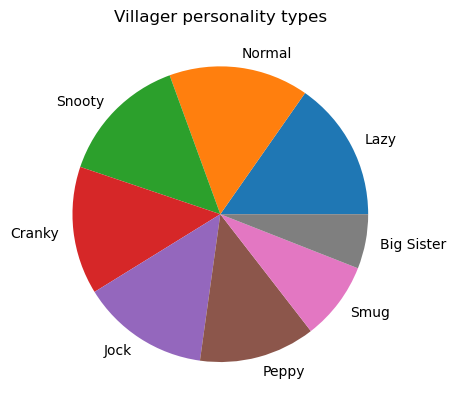

In [11]:
# The same thing but a pie chart this time
villagers["Personality"].value_counts().plot(kind="pie", title="Villager personality types")
plt.ylabel("")
plt.show()

### Species 

In [12]:
villagers["Species"].value_counts()

Cat          23
Rabbit       19
Squirrel     18
Frog         17
Duck         17
Dog          16
Cub          16
Bear         15
Mouse        15
Pig          14
Horse        14
Bird         13
Penguin      13
Sheep        13
Elephant     11
Wolf         11
Ostrich      10
Deer         10
Eagle         9
Gorilla       9
Chicken       9
Koala         9
Goat          8
Hamster       8
Kangaroo      8
Monkey        8
Anteater      7
Hippo         7
Tiger         7
Alligator     7
Lion          7
Bull          6
Rhino         5
Cow           4
Octopus       3
Name: Species, dtype: int64

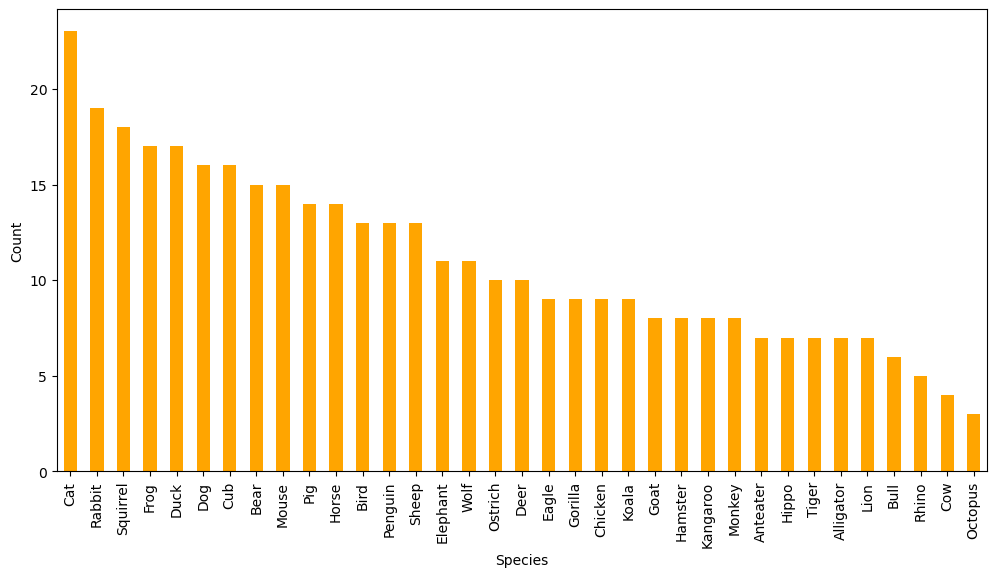

In [13]:
villagers["Species"].value_counts().plot(kind='bar', color="Orange", figsize=(12,6))
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

### Gender

In [14]:
villagers["Gender"].value_counts()

Male      200
Female    186
Name: Gender, dtype: int64

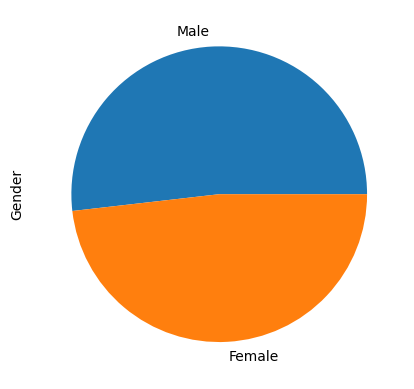

In [15]:
villagers["Gender"].value_counts().plot(kind="pie")
plt.show()

## Combinations of things! 

In [16]:
# Number of personality types in each tier
villagers.groupby('Tier').Personality.value_counts()

Tier  Personality
1     Lazy            4
      Normal          4
      Smug            2
      Snooty          2
2     Normal          6
      Peppy           6
      Lazy            4
      Cranky          2
      Jock            2
      Smug            2
      Big Sister      1
      Snooty          1
3     Normal          8
      Big Sister      5
      Cranky          4
      Peppy           4
      Jock            3
      Lazy            2
      Smug            2
      Snooty          1
4     Peppy          10
      Lazy            9
      Normal          8
      Big Sister      6
      Smug            6
      Snooty          6
      Cranky          5
      Jock            5
5     Lazy           19
      Normal         19
      Jock           17
      Peppy          16
      Snooty         15
      Cranky         12
      Big Sister      7
      Smug            5
6     Cranky         31
      Snooty         30
      Jock           27
      Lazy           21
      Smug           1

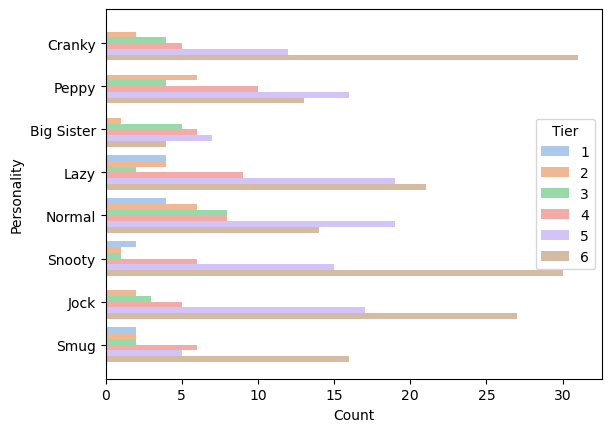

In [17]:
# Making it into a plot!
sns.countplot(data=villagers, y="Personality", hue="Tier", palette="pastel")
plt.plot()
plt.xlabel("Count")
plt.show()

Perhaps unsurprisingly, the least popular villagers are cranky, snooty, and jocks.

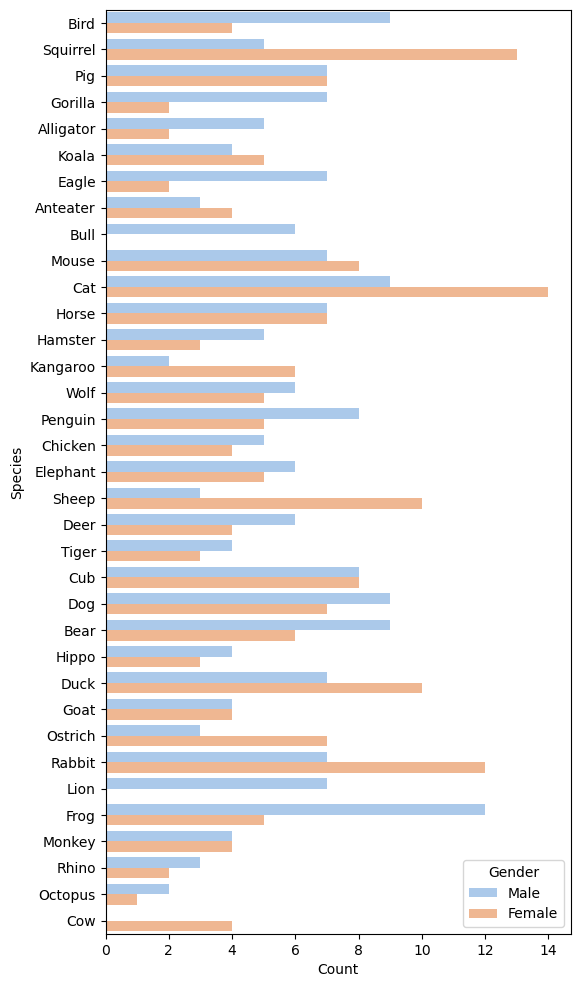

In [18]:
# Gender breakdown for each species  
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,12

sns.countplot(y="Species", hue="Gender", data=villagers, palette="pastel")
plt.xlabel("Count")
plt.show()

In [19]:
# Moving over to Plotly because I like some of its functionality
fig = px.bar(villagers, x="Personality", color="Gender", barmode="stack",
             hover_data=['Name','Species'], labels={"count":"Count"}, title="Villager personality types")
fig.show()

In Plotly bar charts, the bar segments are sized based on the value of the sample (e.g. a villager with popularity 234 will be given a larger portion of the bar than a villager with popularity 2). This means less popular villagers are shown to take up more space than than more popular villagers, so we're flipping the popularity order so this doesn't happen.

In [20]:
# Flipping order of values to correct for bar size in future plots
# More popular villagers should have larger bars in chart than less popular villagers
villagers = villagers.sort_values('Total_Popularity')
r = np.flip(villagers["Total_Popularity"].values)
villagers['Total_Popularity_Updated'] = r
villagers

,Name,Species,Gender,Personality,Hobby,Style_1,Style_2,Color_1,Color_2,Tier,Rank,Total_Popularity,Total_Popularity_Updated
296,Raymond,Cat,Male,Smug,Nature,Elegant,Cool,Black,Gray,1,1,1,413
227,Marshal,Squirrel,Male,Smug,Music,Elegant,Cool,Light blue,Blue,1,2,2,412
326,Sherb,Goat,Male,Lazy,Nature,Simple,Cute,Gray,Blue,1,4,4,411
12,Ankha,Cat,Female,Snooty,Nature,Gorgeous,Simple,Colorful,Brown,1,7,7,410
385,Zucker,Octopus,Male,Lazy,Nature,Simple,Cute,Blue,Yellow,1,8,8,409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Rocco,Hippo,Male,Cranky,Education,Simple,Cool,Yellow,Black,6,159,409,8
36,Bettina,Mouse,Female,Normal,Education,Simple,Elegant,White,Red,6,160,410,7
53,Boris,Pig,Male,Cranky,Nature,Cool,Gorgeous,Purple,Black,6,161,411,4
43,Bitty,Hippo,Female,Snooty,Education,Cute,Elegant,Pink,Orange,6,162,412,2


In [21]:
# Checking that Marshal now has the second greatest popularity value
villagers.query("Name == 'Marshal'")

,Name,Species,Gender,Personality,Hobby,Style_1,Style_2,Color_1,Color_2,Tier,Rank,Total_Popularity,Total_Popularity_Updated
227,Marshal,Squirrel,Male,Smug,Music,Elegant,Cool,Light blue,Blue,1,2,2,412


Now, Marshal has a popularity of 412, giving him a much larger portion of the bar. 

In [22]:
fig = px.bar(villagers.query("Species=='Squirrel'"), x="Personality", y="Total_Popularity_Updated", color="Gender",
             hover_data=["Name", "Species", "Gender"], labels={"Total_Popularity_Updated":"Popularity"}, 
             title="Popularity and personality type of squirrel villagers")
fig.show()

## Predicting new popular villagers

### Preprocessing

I decided to make this model a binary classifier based on whether a villager is popular or not popular. I arbitrarily chose the top 1/3, but other values would work too. I'm also taking a subset of the data that does not include popularity information to use for predictions.

In [23]:
# Determining a popular/not popular threshold for predictions 
subs = villagers[['Name',
    'Species', 'Gender', 'Personality', 'Hobby', 'Style_1', 'Style_2', 'Color_1', 'Color_2']].copy()
    #, 'Tier', 'Rank', 'Total_Popularity'],
pop = np.full(len(subs), "Yes")
pop[round(len(subs)*0.33):] = "No"
subs["Popular"] = pop

In [24]:
# This leaves us with 127 popular villagers and 259 unpopular villagers
subs["Popular"].value_counts()

No     259
Yes    127
Name: Popular, dtype: int64

In [25]:
# Removing names and unhelpful features and splitting into X and y 
# Unhelpful features chosen empirically
X = subs[[#'Name',
          'Species', 
          'Gender',
          'Personality',
          'Hobby',
          'Style_1',
          #'Color_1', 
          #'Style_2',
          #'Color_2'
         ]].copy().reset_index(drop=True)
y = subs["Popular"].copy().reset_index(drop=True)

### More imports

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score

### Encoding the categorical data

The data is nominal not ordinal so I am using sklearn's one hot encoder.

In [27]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore").fit(X)
X_encoded = encoder.transform(X)
#X_encoded
encoder.categories_

[array(['Alligator', 'Anteater', 'Bear', 'Bird', 'Bull', 'Cat', 'Chicken',
        'Cow', 'Cub', 'Deer', 'Dog', 'Duck', 'Eagle', 'Elephant', 'Frog',
        'Goat', 'Gorilla', 'Hamster', 'Hippo', 'Horse', 'Kangaroo',
        'Koala', 'Lion', 'Monkey', 'Mouse', 'Octopus', 'Ostrich',
        'Penguin', 'Pig', 'Rabbit', 'Rhino', 'Sheep', 'Squirrel', 'Tiger',
        'Wolf'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Big Sister', 'Cranky', 'Jock', 'Lazy', 'Normal', 'Peppy', 'Smug',
        'Snooty'], dtype=object),
 array(['Education', 'Fashion', 'Fitness', 'Music', 'Nature', 'Play'],
       dtype=object),
 array(['Active', 'Cool', 'Cute', 'Elegant', 'Gorgeous', 'Simple'],
       dtype=object)]

We can then look at a sample and see what features come from that

In [28]:
encoder.inverse_transform(X_encoded[37].reshape(1, -1))

array([['Squirrel', 'Male', 'Lazy', 'Nature', 'Simple']], dtype=object)

If we query the villagers data set we can see which villager it is and what their rank is. 

In [29]:
villagers.query("Species == 'Squirrel' and Gender == 'Male' and Personality == 'Lazy' and Hobby == 'Nature'")

,Name,Species,Gender,Personality,Hobby,Style_1,Style_2,Color_1,Color_2,Tier,Rank,Total_Popularity,Total_Popularity_Updated
134,Filbert,Squirrel,Male,Lazy,Nature,Simple,Cute,Blue,White,3,2,42,375


And if we look at y, he should be marked as popular, which he is! 

In [30]:
y[37]

'Yes'

### Train/test split

We choose 10% as the test split and stratify the data based on y so there is an even proportion of popular and unpopular villagers in the test and training sets.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.10, random_state=34, stratify=y)

In [32]:
#model = DecisionTreeClassifier()
#model = LinearSVC()
#model = KNeighborsClassifier(n_neighbors=5)
#model = LogisticRegression(solver="newton-cg", penalty='l2', max_iter=200, fit_intercept=True, C=10)
model = LogisticRegression()#(solver="newton-cg", penalty='l2', max_iter=200, fit_intercept=True, C=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

print(f'Model accuracy on the training set is {accuracy_score(y_train, y_pred):0.5f}')

Model accuracy on the training set is 0.81844


Since the data set is unbalanced with mostly unpopular villagers, we can use a dummy data set of only no as our baseline. 

In [33]:
y_dummy = np.full_like(y_train, 'No')
print(f"Baseline accuracy is {accuracy_score(y_train, y_dummy):0.4f}")

Baseline accuracy is 0.6715


Evaluating on the test set, we get an accuracy of about 71.79%, which isn't really great, but it's better than guessing. That score can almost definitely be improved by more hyperparameter tuning and feature selection. (coming soon?)

In [34]:
print(f"Accuracy on the test set is {model.score(X_test, y_test):0.4f}")

Accuracy on the test set is 0.7179


## My new bffl Pancake 
To test my new, definitely highly accurate prediction model, I am making a fake villager I will call Pancake. She is a cute, normal hamster whose hobby is nature. Let's see if she's popular! 

In [35]:
Pancake = ["Hamster", "Female", "Normal", "Nature", "Cute"]
model.predict(encoder.transform([Pancake]))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array(['Yes'], dtype=object)

She's popular!! Of course she is. With a name like Pancake she has to be popular.